In [1]:
# bit.do/learn-ml-cvs-11

'''
cURL is a computer software project providing a library and command-line tool for transferring data using various protocols. 
Bash is a command line interpreter that typically runs in a text window where user can interpret commands to carry out various actions.

curl is a Bash command. You can execute Bash commands in a Jupyter notebook by prefixing them with an exclamation mark. 
This command downloads a CSV file from Azure blob storage and saves it using the name flightdata.csv.
'''

!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  1175k      0  0:00:52 --:--:--  0:00:52 3055000:01  0:00:01 --:--:-- 1177k




# STEP 1: FETCH THE DATA

In [2]:
'''
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data 
structures and data analysis tools for the Python programming language.


A DataFrame is a two-dimensional labeled data structure. The columns in a DataFrame can be of different types, just like columns in a spreadsheet or database table.
It is the most commonly used object in Pandas. In this exercise, you will examine the DataFrame — and the data inside it — more closely.

The DataFrame that you created contains on-time arrival information for a major U.S. airline. It has more than 
11,000 rows and 26 columns. (The output says "5 rows" because DataFrame's head function only returns the first five rows.)
Each row represents one flight and contains information such as the origin, the destination, the scheduled departure time, 
and whether the flight arrived on time or late. We'll look at the data more closely a bit later in this module.
'''

import pandas as pd
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.shape

(11231, 26)

In [4]:
'''
To know if shape is not a function , what is it ?
'''
help(pd.DataFrame.shape)

Help on property:

    Return a tuple representing the dimensionality of the DataFrame.
    
    See Also
    --------
    ndarray.shape
    
    Examples
    --------
    >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
    >>> df.shape
    (2, 2)
    
    >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4],
    ...                    'col3': [5, 6]})
    >>> df.shape
    (2, 3)



In [5]:
'''
To see what the head function does?
'''
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self, n=5)
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    obj_head : type of caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    pandas.DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal':['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3       lion
    4     monkey
    5     parrot
    6      shark
    7      whale
    8      zebra
    
    Viewing the first 5 lines
    
    >>> df.head()
          animal
  

# LET US STUDY EACH COLUMN IN DETAIL USING THE PRESENTATION


# STEP 2: CLEAN AND PREPARE DATA 


In [6]:
'''

To eliminate missing values, either by deleting the
rows or columns containing them or replacing them with
meaningful values. 

Eliminate extraneous columns

Selecting the "feature" columns that are relevant to the
outcome you are trying to predict while filtering out
columns that do not affect the outcome, could bias 

Binning or quantization of the data

Convert columns containing categorical data to discrete
columns containing indicator values

Confirm that the output is "True," which indicates that
there is at least one missing value somewhere in the
dataset.


'''

df.isnull().values.any()
#checking if there is any null values

True

In [7]:

#df.isnull()  # gives a whole table which gives true or false for which each column of the dataframe
df.isnull().values #a 2D list of true or false
df.isnull().values.any() #check if any null values are present



True

In [8]:
df.isnull().values.any()

True

In [9]:
# The next step is to find out where the
# missing values are.
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [10]:
'''
Curiously, the 26th column ("Unnamed: 25") contains 11,231 missing values, which equals the number of rows in the dataset. 
This column was mistakenly created because the CSV file that you imported
contains a comma at the end of each line. To eliminate that column, add the following code to the notebook and execute it:'''
#axis : {0 or ‘index’, 1 or ‘columns’}, default 0
#Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [11]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index, columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    
        .. versionadded:: 0.21.0
    level : int or level name, optional
        For MultiIndex, level from which the labels will be removed.

In [12]:
'''
The DataFrame still contains a lot of missing values, but some of them aren't useful because the columns
containing them are not relevant to the model that you are building. The goal of that model is to predict whether
a flight you are considering booking is likely to arrive on time. If you know that the flight is likely to be late,
you might choose to book another flight.

The next step, therefore, is to filter the dataset to eliminate columns that aren't relevant to a predictive model. 
For example, the aircraft's tail number probably has little bearing on whether a flight will arrive on time, and at the 
time you book a ticket, you have no way of knowing whether a flight will be cancelled, diverted, or delayed. 
By contrast, the scheduled departure time could have a lot to do with on-time arrivals. 

'''

df = df[["MONTH", "DAY_OF_MONTH",
         "DAY_OF_WEEK", "ORIGIN", "DEST",
         "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [13]:
'''
The only column that now contains missing values is the ARR_DEL15 column, 
which uses 0s to identify flights that arrived on time and 1s for flights that didn't. 
The reason these rows are missing ARR_DEL15 values is that they all correspond to flights that were canceled or diverted. 
'''

df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [14]:
'''

You could call dropna on the DataFrame to remove these rows. But since a flight that is canceled 
or diverted to another airport could be considered "late," let's use the fillna method to replace the missing values with 1s.

Use the following code to replace missing values in the ARR_DEL15 column with 1s and display rows 177 through 184:
'''

df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [15]:
'''
Intuitively, it makes sense, because it probably doesn't
matter much whether a flight leaves at 10:30 a.m. or 10:40
a.m.
It matters a great deal whether it leaves at 10:30 a.m. or 5:30 p.m.

Binning/Quantization : 

Equal width (or distance) binning : The simplest binning approach is to partition the range of the variable into k equal-width intervals. 
The interval width is simply the range [A, B] of the variable divided by k,
w = (B-A) / k
A=0000 , B=2359 so after dividing by 100 all values will be between 00 and 23.
'''

#:iterrows(): Iterate over the rows of a DataFrame as (index, Series) pairs. This converts the rows to
#Series objects, which can change the dtypes and has some performance implications.

import math
for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
    #index means row index, row contains all columns with values
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [16]:
'''
To convert a categorical variable into a “dummy” or “indicator” DataFrame, for example a column in a
DataFrame (a Series) which has k distinct values, can derive a DataFrame containing k columns of 1s and
0s using get_dummies():

'''

dd= pd.DataFrame({'city': ('delhi','chennai','bengaluru','delhi','delhi','bengaluru'), 'guest_no': range(6)})

In [17]:
dd

,city,guest_no
0,delhi,0
1,chennai,1
2,bengaluru,2
3,delhi,3
4,delhi,4
5,bengaluru,5


In [18]:
dd=pd.get_dummies(dd,columns=['city'])

In [19]:
dd

,guest_no,city_bengaluru,city_chennai,city_delhi
0,0,0,0,1
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,0,0,1
5,5,1,0,0


In [20]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


# STEP 3: Build Machine Learning Model


In [21]:
'''
https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

The first statement imports scikit-learn's train_test_split helper function.
The second line uses the function to split the DataFrame into a training set containing 80% of the original data,
and a test set containing the remaining 20%. The random_state parameter seeds the random-number generator used to do the splitting,
while the first and second parameters are DataFrames containing the feature columns and the label column.

train_test_split returns four DataFrames. 
'''

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [24]:
'''
Random forest classifier
https://www.datacamp.com/community/tutorials/random-forests-classifier-python
Scikit-learn includes a variety of classes for implementing common machine learning models. One of them is RandomForestClassifier,
which fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.

The output shows the parameters used in the classifier, including n_estimators, which specifies the number of trees in
each decision-tree forest, and max_depth, which specifies the maximum depth of the decision trees. 
The values shown are the defaults, but you can override any of them when creating the RandomForestClassifier object.
'''

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [23]:
train_x

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10303,11,3,4,20,0,1,0,0,0,0,0,0,1,0
6037,7,23,6,11,0,0,0,0,1,0,0,1,0,0
1315,2,19,5,7,1,0,0,0,0,0,1,0,0,0
9661,11,13,7,17,0,1,0,0,0,1,0,0,0,0
10594,12,10,6,5,0,0,0,1,0,1,0,0,0,0
3461,5,2,1,13,0,0,0,0,1,0,0,0,1,0
8949,10,19,3,16,1,0,0,0,0,0,0,0,0,1
1339,2,20,6,6,0,0,0,1,0,0,0,0,0,1
4467,6,5,7,12,1,0,0,0,0,0,0,1,0,0
738,1,30,6,15,1,0,0,0,0,0,0,1,0,0


In [26]:
'''Now call the predict method to test the model using the values in test_x,
followed by the score method to determine the mean accuracy of the model:
We will go over each line in detail.'''
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8602581219403649

In [27]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
'''
This piece of code is not to be written or executed.
It is to show the what values has our model classified the flight into , 1 for late and 0 for on time.
'''

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
model.predict(test_x) # this was just to check the 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
help(RandomForestClassifier.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [28]:
'''
 prediction probabilities for the test set.
 These probabilities are estimates for each of the classes, or answers, the model can predict. 
 For example, [0.88199435, 0.11800565] means that there's an 89% chance that a flight will arrive on time (ARR_DEL15 = 0) 
 and a 12% chance that it won't (ARR_DEL15 = 1). The sum of the two probabilities adds up to 100%.
'''
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [29]:
probabilities #it prints the probability for each flight in the test set

array([[0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [0.9, 0.1],
       [0.7, 0.3],
       [1. , 0. ]])

In [74]:
'''
SKIP
Image on precision and recall,confusion matrix
https://medium.com/x8-the-ai-community/understanding-ml-evaluation-metrics-precision-recall-2b3fb915b666'''


'''The first row in the output represents flights that were on time. The first column in that row shows how many
flights were correctly predicted to be on time, while the second column reveals how many flights were predicted as delayed
but weren't. From this, the model appears to be adept at predicting that a flight will be on time.

Generating a confusion matrix

Generating a confusion matrix

But look at the second row, which represents flights that were delayed. The first column shows how 
many delayed flights were incorrectly predicted to be on time. The second column shows how many flights were 
correctly predicted to be delayed. Clearly, the model isn't nearly as adept at predicting that a flight will be delayed 
as it is at predicting that a flight will arrive on time. What you want in a confusion matrix is large numbers in the 
upper-left and lower-right corners, and small numbers (preferably zeros) in the upper-right and lower-left corners.'''

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)


array([[1809,  127],
       [ 240,   71]])

# Step 5:Visualizing and output of the model

In [36]:
'''
The first statement is one of several magic commands supported by the Python kernel that you selected when you created the notebook. 
It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show. And it 
must appear before any references to Matplotlib itself. The final statement configures Seaborn to enhance the output from Matplotlib.
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [30]:
'''
https://www.programiz.com/python-programming/datetime/strptime
The function isoweekday() returns an integer value  corresponding to the day of the week.

This function takes as input a date and time, an origin airport code, and a destination airport code, 
and returns a value between 0.0 and 1.0 indicating the probability that the flight will arrive at its destination on time.
It uses the machine-learning model you built in the previous lab to compute the probability. And to call the model,
it passes a DataFrame containing the input values to predict_proba. The structure of the DataFrame exactly matches the 
structure of the DataFrame we used earlier.

'''

def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]
    
    if(model.predict(pd.DataFrame(input))==0):
        print("The flight will be on time")
    else:
        print("The flight will be delayed")
        
    print("The probability of the flight being on time is")
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [31]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

The flight will be on time
The probability of the flight being on time is


1.0

In [32]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

The flight will be on time
The probability of the flight being on time is


0.6

In [33]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

The flight will be on time
The probability of the flight being on time is


0.8

The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is
The flight will be on time
The probability of the flight being on time is


(0.0, 1.0)

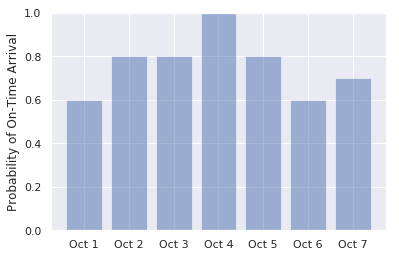

In [37]:
'''
 plot the probability of on-time arrivals for an evening flight from JFK to ATL over a range of days:
'''
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels)) #x co-ordinates of the bar plot

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

In [ ]:
labels

In [ ]:
len(labels)

In [ ]:
np.arange(len(labels))

In [88]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

In [144]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()           # Get locations and labels
    
        xticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` a